# Game sales analysis

The "Strimchik" online store sells computer games all over the world. Historical game sales data, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) up to December 2016 are available from open sources. It is necessary to identify patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.

**Work Plan**

- **Step 1. Open the data file and examine the general information**
    - File path: /datasets/games.csv


- **Step 2. Prepare the data**
    - Replace the names of the columns (reduced to lower case);
    - Let's transform the data into the necessary types. Let's describe in which columns the data type was replaced and why;
    - Process gaps if necessary:
      - We will explain why we filled in the gaps in a certain way or why we did not do it;
      - Describe the reasons that could lead to omissions;
      - Pay attention to the abbreviation 'tbd' in the rating columns. We will analyze this value separately and describe how to process it;
    - Calculate the total sales in all regions and write them in a separate column.
    
    
- **Step 3. Conduct an exploratory data analysis**
    - Let's see how many games were produced in different years. Is data for all periods important?;
    - Let's see how sales have changed by platform. Let's choose the platforms with the highest total sales and plot the distribution by years. How long does it take for new platforms to appear and old ones to disappear?;
    - Let's take the data for the corresponding actual period. The current period will be determined independently as a result of the study of previous issues. The main factor is that these data will help build a forecast for 2017. We will not take into account the data for previous years.
    - Which platforms are leading in sales, growing or falling? Let's choose a few potentially profitable platforms.
    - Plot a box-and-mustache plot of global game sales by platform. Let's describe the result.
    - Let's see how the reviews of users and critics affect sales within one popular platform. Let's build a scatterplot and calculate the correlation between reviews and sales. Let's formulate conclusions.
    - Correlate the conclusions with sales of games on other platforms.
    - Let's look at the general distribution of games by genre. What about the most profitable genres? Do genres with high and low sales stand out?
    
    
- **Step 4. Create a user profile for each region**
    - Define for the user of each region (NA, EU, JP):
      - Most popular platforms (top 5). Let us describe the differences in sales shares.
      - The most popular genres (top 5). Let's explain the difference.
      - Does the ESRB rating affect sales in a particular region?
      
      
- **Step 5. Check the hypotheses**
    - The average user ratings of the Xbox One and PC platforms are the same;
    - The average user ratings of the genres Action and Sports are different.
    - Let's set the threshold value alpha ourselves.
    - Let's explain:
      - How we formulated the null and alternative hypotheses;
      - What criterion was used to test the hypotheses and why.
      
      
- **Step 6. Write a general conclusion**
    - Design: Let's complete the task in Jupyter Notebook. Let's fill in the program code in cells of the code type, text explanations in the cells of the markdown type. Apply formatting and headings.

## Data overview

Let's open the table and see general information about it.

In [1]:
# import required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker
from scipy import stats as st

In [2]:
# reading data file and saving to df
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('C:/Users/tatar/downloads/games.csv')
df.head() # print the first 5 rows of the table

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info() # getting general information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The `df` table has eleven columns. The data types in the columns are different - float64 and object.

According to the data documentation:

* `Name` - game name;
* `Platform` — platform;
* `Year_of_Release` - year of release;
* `Genre` — game genre;
* `NA_sales` - sales in North America (millions of copies sold);
* `EU_sales` - sales in Europe (millions of copies sold);
* `JP_sales` - sales in Japan (millions of copies sold);
* `Other_sales` - sales in other countries (millions of copies sold);
* `Critic_Score` - score of critics (maximum 100);
* `User_Score` - user score (maximum 100);
* `Rating` — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

Check the table for missing values and duplicates.

In [4]:
df.isna().sum() # count missing values in a table

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
df.duplicated().sum() # counting duplicates in a table

0

**Conclusions**

* It is necessary to replace the names of the columns, bring them to lower case;
* It is necessary to cast the data in the `Year_of_Release` and `User_Score` columns to the correct type;
* There are missing values in the `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` and `Rating` columns;
* No duplicates.

## Data preprocessing

Let's replace the names of the columns, bring them to lower case.

In [6]:
df.rename(str.lower, axis='columns', inplace=True) # renaming columns
df.columns # check

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Let's convert the data to the types we need:

     * in the `year_of_release` column, we will cast the data to the 'int64' type (for better readability of the table);
     * in the `user_score` column, cast the data to the 'float64' type (according to the documentation for the data, there should be a numeric score up to 100 here).
    
First, let's look at the unique values of the `user_score` column.

In [7]:
df['user_score'].unique() # display unique values of column 'user_score'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**tbd** values were found among the numeric values of the `user_score` column, which means **to be determined**. This is possible when the rating is not currently determined. It is most logical to replace these values with Nan.

In [8]:
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True) # replacing 'tbd' with 'nan' in 'user_score' column
df['user_score'].unique() # check

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Now you can make the planned replacement of the data type in the `user_score` column.

In [9]:
df['user_score'] = df['user_score'].astype('float') # changing data type in 'user_score' column
df['user_score'].dtype # check

dtype('float64')

To change the data type in the `year_of_release` column, you must first deal with missing values. Missing values here could occur during automatic filling of the dataframe. We could try to fill in the missing values based on the names of the games and the platforms they were released on. However, as practice shows, some games can be released in different years on different platforms. Let's calculate the proportion of missing values in the `year_of_release` column of the total amount of data.

In [10]:
print('The proportion of missing values in the \'year_of_release\' column is:', round((df['year_of_release'].isna().sum() 
                                                                         / len(df['year_of_release']) * 100), 2), '%')

The proportion of missing values in the 'year_of_release' column is: 1.61 %


Given this, these missing values can be removed.

In [11]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True) # remove missing values in 'year_of_release' column
df['year_of_release'].isna().sum() # check

0

Now you can make the planned change of data type in the `year_of_release` column.

In [12]:
df['year_of_release'] = df['year_of_release'].astype('int') # changing data type in 'user_score' column
df.head() # check

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Let's move on to handling missing values in the dataframe. Let's look at the rows with missing values in the `name` and `genre` columns.

In [13]:
df[(df['name'].isna()) & (df['genre'].isna())] # output lines with missing values

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


These lines can be removed.

In [14]:
df = df.dropna(subset=['name']).reset_index(drop=True) # removing missing values in 'name' and 'genre' columns
df.isna().sum() # check

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Missing values in the `critic_score`, `user_score` and `rating` columns could occur when importing data from other sources. Ratings are subjective assessments that depend on many factors and it is not possible to fill these missing values in the data at this stage. The only thing is that here you can replace the gaps in the `rating` column with **tbd** for completeness of further research, especially since the values in this column are of the object data type, not numeric.

In [15]:
df['rating'] = df['rating'].fillna('tbd') # replacing missing values with 'tbd' in the 'rating' column
df['rating'].value_counts() # check 

tbd     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Let's calculate the total sales in all regions and write them in a separate column.

In [16]:
# adding a column with the calculation of total sales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] 
df.head() # check

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,tbd,31.38


**Conclusions**

So we did the following:
* Replaced the names of the columns, brought them to lowercase;
* Resulted in the correct type of data in the columns `Year_of_Release` and `User_Score`;
* Handled missing values in `Name`, `Year_of_Release` and `Genre` columns;
* We calculated and entered data on total sales into the dataframe.

## Exploratory data analysis

Let's see how many games were released in different years. Let's determine whether the data for all periods is important. To do this, we will build a graph based on a pivot table.

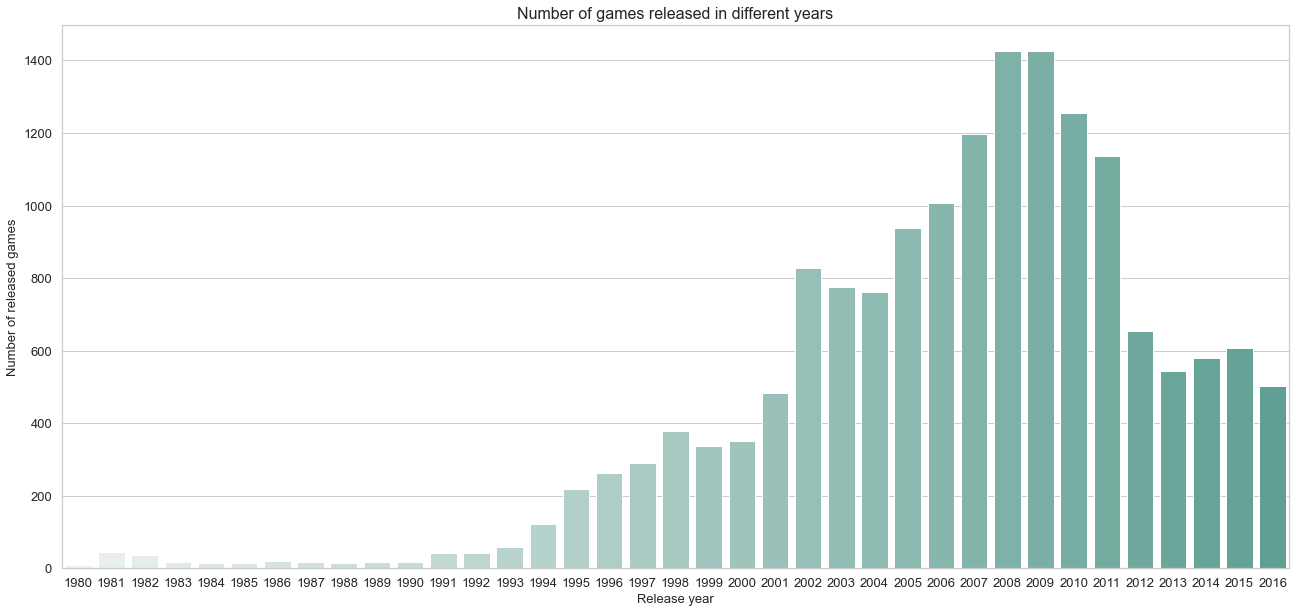

In [17]:
# formation of a pivot table
games_by_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_by_year.columns = ['count']

# building a bar chart
plt.figure(figsize=(22,10))
sns.set_theme(style='whitegrid')
sns.barplot(x=games_by_year.index, y='count', data=games_by_year, palette='light:#5A9')
plt.title('Number of games released in different years', fontsize=16)
plt.tick_params(labelsize=13)
plt.xlabel('Release year', fontsize=13)
plt.ylabel('Number of released games', fontsize=13)
plt.show()

It can be seen from the graph that:

* the number of games for game consoles and computers began to grow from 1991 to 2008;
* since 2008, there has been a decline in the number of console games, presumably with the beginning of the growing popularity of mobile platforms;
* data before 1991 may not be as interesting for this analysis due to the small number of released games.

Let's see how sales have changed by platform. Let's choose the platforms with the highest total sales and plot the distribution by years. Let us determine for what characteristic period new platforms appear and old platforms disappear.

To begin with, we will determine the leading platforms in terms of sales.

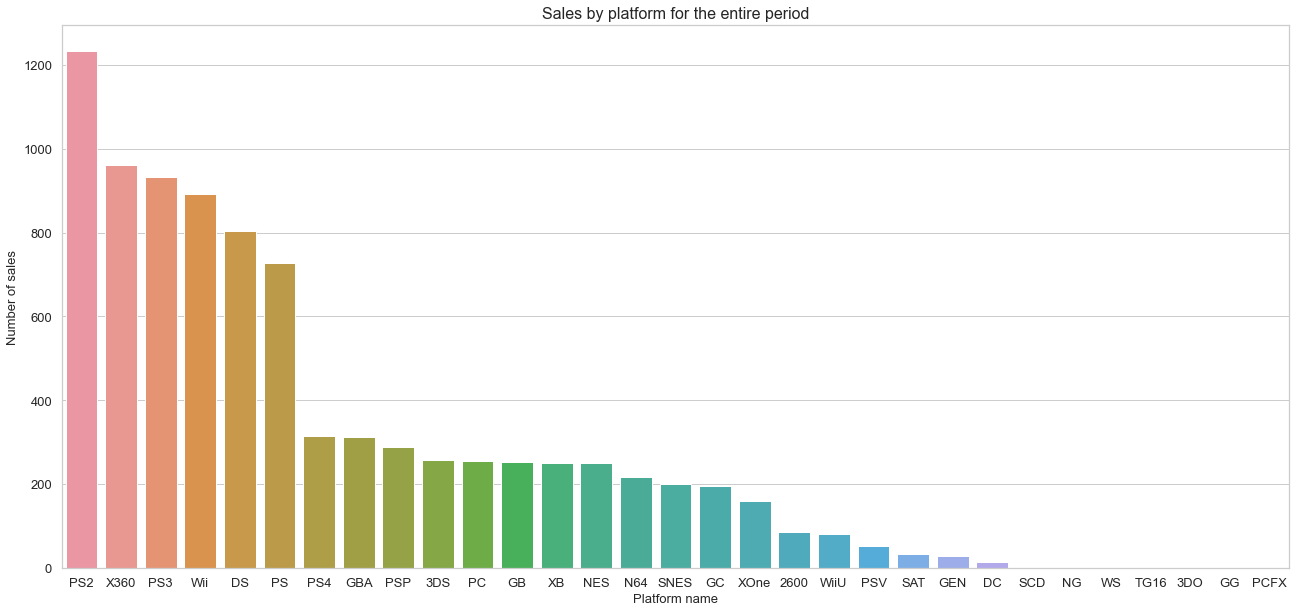

In [18]:
# formation of a pivot table
games_by_platform = (
    df
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

# building a bar chart
plt.figure(figsize=(22,10))
sns.barplot(x=games_by_platform.index, y='total_sales', data=games_by_platform)
plt.title('Sales by platform for the entire period', fontsize=16)
plt.tick_params(labelsize=13)
plt.xlabel('Platform name', fontsize=13)
plt.ylabel('Number of sales', fontsize=13)
plt.show()

The graph shows that the most popular platforms of all time are Sony PlayStation 2, Microsoft Xbox360, Sony PlayStation 3, Nintendo Wii and Nintendo DS.

Let's create a pivot table and display the sales values of the top 5 platforms.

In [19]:
top_5_platforms = (
    df
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .head()
    .reset_index()
)
top_5_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


Now let's build the distribution of the total sales of the top 5 platforms by years until 1991.

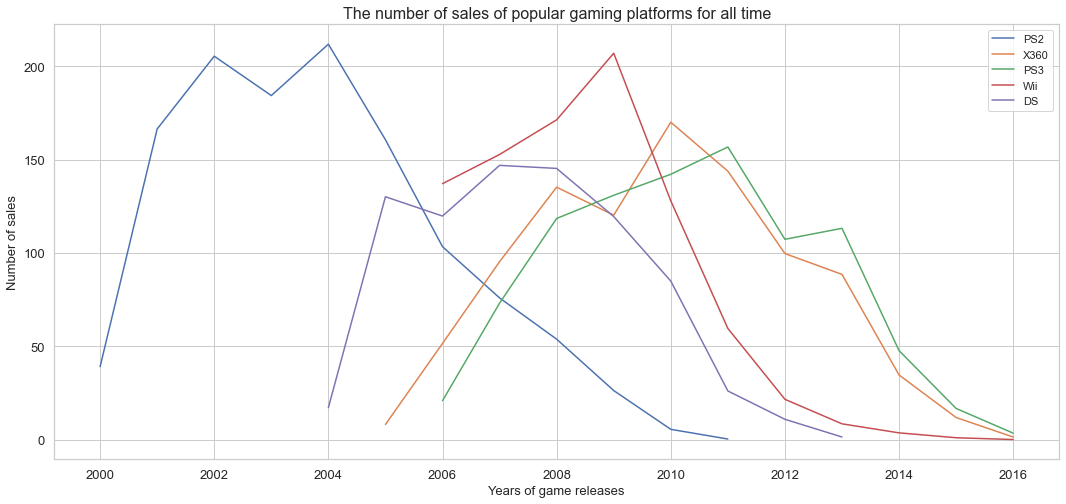

In [20]:
# create a function that will return a pivot table
def top_5_platforms_by_year(name, data):
    total = (
        data
        .loc[(data['platform'] == name) & (data['year_of_release'] > 1991)]
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .sort_values('year_of_release', ascending=False)
    )
    return total

# plotting      
plt.figure(figsize=(18,8))
plt.title('The number of sales of popular gaming platforms for all time', fontsize=16)
plt.tick_params(labelsize=13)
plt.xlabel('Years of game releases', fontsize=13)
plt.ylabel('Number of sales', fontsize=13)
for i in list(top_5_platforms['platform']):
    sns.lineplot(data=top_5_platforms_by_year(i,df)['total_sales'], label=i)
    plt.legend()
plt.show()

Let's find out how many platforms exist on average. To do this, we group the original dataframe by platforms and years of release of games, then calculate the number of years and display characteristic values.

In [21]:
# grouping of source dataframe
platforms_by_year = (
    df
    .groupby(['platform', 'year_of_release'])
    .agg({'total_sales':'sum'})
    .reset_index()
) 
display(platforms_by_year['platform'].value_counts()) # displaying the number of years of life of each platform
print('Average number of years of life of each platform:', 
      round(platforms_by_year['platform'].value_counts().mean(), 2), 'years') 

PC      26
GB      13
NES     12
X360    12
PSP     12
PS2     12
Wii     11
DS      11
PS3     11
2600    10
SNES    10
PS      10
XB       9
GBA      8
DC       7
GC       7
N64      7
SAT      6
3DS      6
PSV      6
WiiU     5
GEN      5
NG       4
PS4      4
XOne     4
WS       3
SCD      2
3DO      2
TG16     1
GG       1
PCFX     1
Name: platform, dtype: int64

Average number of years of life of each platform: 7.68 years


We found out that:

* the most popular platforms of all time are Sony PlayStation 2, Microsoft Xbox360, Sony PlayStation 3, Nintendo Wii and Nintendo DS;
* sales grow for 3-5 years, then demand inevitably falls, with a high degree of probability due to the emergence of new, more advanced platforms;
* the average number of years of platform life is almost 8 years.

Let's choose the 5 most profitable platforms for the period from 2013 to 2016. The period is chosen based on the average number of years of the platform's life and the fact that about 4 years there is both an increase and a decrease in sales. These data should help build a forecast for 2017.

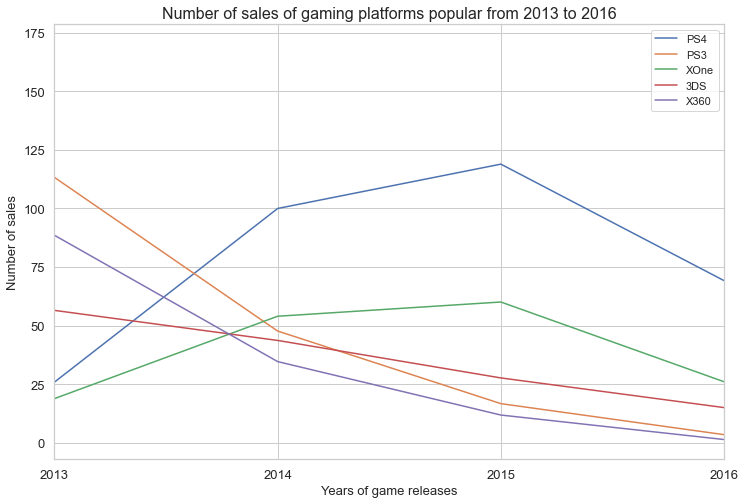

In [22]:
# formation of a pivot table
top_5_platforms_by_sales = (
    df
    .loc[df['year_of_release'] >= 2013]
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False).head().reset_index()
)

# plotting       
plt.figure(figsize=(12,8))
plt.title('Number of sales of gaming platforms popular from 2013 to 2016', fontsize=16)
plt.tick_params(labelsize=13)
plt.xlabel('Years of game releases', fontsize=13)
plt.ylabel('Number of sales', fontsize=13)
for i in list(top_5_platforms_by_sales['platform']):
    g = sns.lineplot(data=top_5_platforms_by_year(i,df)['total_sales'], label= i)
    plt.legend()
g.set(xlim=(2013, 2016))
locator = matplotlib.ticker.FixedLocator([2013, 2014, 2015, 2016])
g.xaxis.set_major_locator(locator)
plt.show()

The situation over the past 4 years is somewhat different, the most popular platforms have changed and now they are Sony PlayStation 4, Sony PlayStation 3, Microsoft Xbox One, Nintendo 3DS and Microsoft Xbox360.

Let's plot a boxplot chart of global game sales by platform.

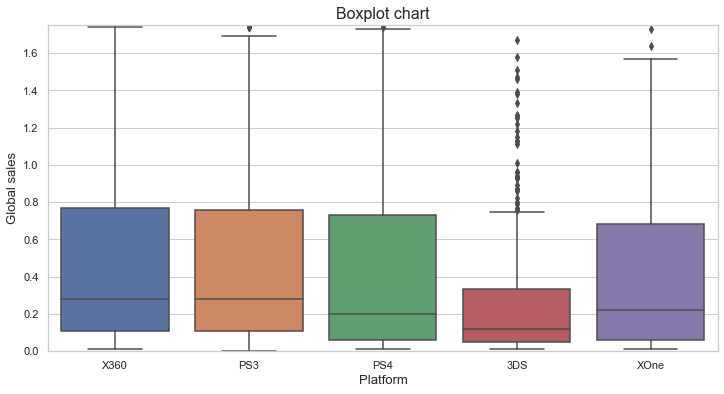

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,512.0,0.503535,1.441271,0.01,0.05,0.12,0.3325,14.60
PS3,1306.0,0.713124,1.403065,0.00,0.11,0.28,0.7600,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
X360,1232.0,0.780227,1.632122,0.01,0.11,0.28,0.7700,21.82
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


In [23]:
# save in the df_top_5_platforms variable the information on the top 5 platforms from 2013 to 2016
list_of_top_5 = list(top_5_platforms_by_sales['platform'])
df_top_5_platforms = df[df['platform'].isin(list_of_top_5)]

# boxplot charting
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_5_platforms, x='platform', y='total_sales')
plt.title('Boxplot chart', fontsize=16)
plt.xlabel('Platform', fontsize=13)
plt.ylabel('Global sales', fontsize=13)
plt.ylim(0, 1.75)
plt.show()

# displaying of characteristic values for global game sales by platform
df_top_5_platforms.groupby('platform')['total_sales'].describe()

We found out that:

* over the past 4 years, Sony PlayStation 4, Sony PlayStation 3, Microsoft Xbox One, Nintendo 3DS and Microsoft Xbox360 have become the most popular platforms;
* the Sony PlayStation 4 platform is in its active commercial phase, while the leaders in sales in 2013: Sony PlayStation 3 and Microsoft Xbox360, by 2016 have already exhausted their commercial resource;
* sales across platforms in the top 5 are similar (similar median, mean, and standard deviation) with the exception of Nintendo 3DS.

Let's see how the reviews of users and critics affect sales within one popular platform. Take for example the Sony PlayStation 2 as a relatively recent platform that has gone through a full life cycle. Let's build a scatterplot and calculate the correlation between reviews and sales.

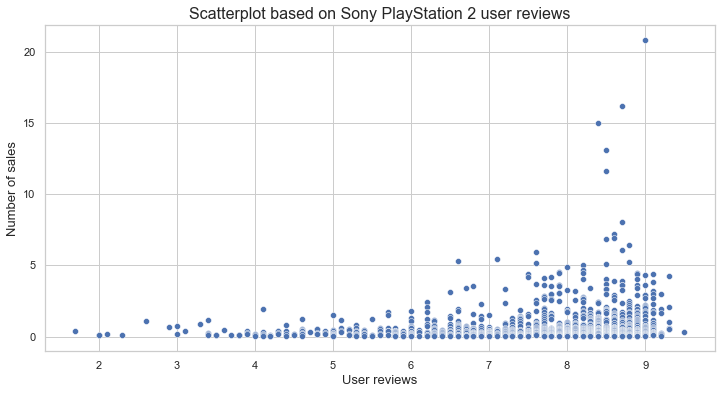

Correlation between user reviews and sales: 0.18


In [24]:
# form an auxiliary dataframe
ps_2 = df[df['platform'] == 'PS2']

# build a scatterplot based on user reviews
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=ps_2)
plt.title('Scatterplot based on Sony PlayStation 2 user reviews', fontsize=16)
plt.xlabel('User reviews', fontsize=13)
plt.ylabel('Number of sales', fontsize=13)
plt.show()

print('Correlation between user reviews and sales:', round(ps_2['user_score'].corr(ps_2['total_sales']), 2))

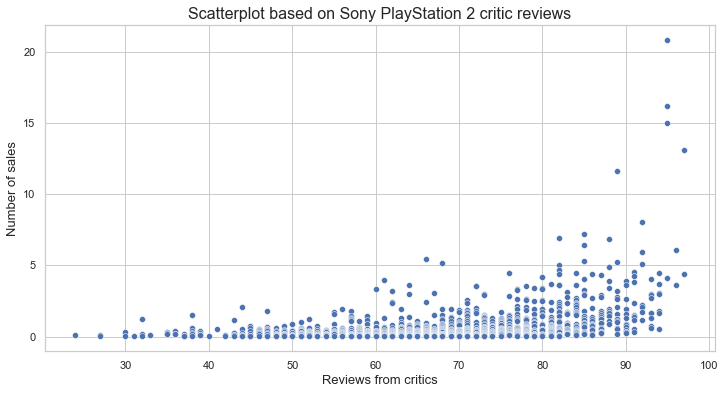

Correlation between critical reviews and sales: 0.39


In [25]:
# build a scatterplot based on critic reviews
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps_2)
plt.title('Scatterplot based on Sony PlayStation 2 critic reviews', fontsize=16)
plt.xlabel('Reviews from critics', fontsize=13)
plt.ylabel('Number of sales', fontsize=13)
plt.show()

print('Correlation between critical reviews and sales:', round(ps_2['critic_score'].corr(ps_2['total_sales']), 2))

It can be concluded that user and critic reviews have little effect on sales of the Sony PlayStation 2 platform. The influence of critic reviews is higher than that of user reviews.

Let's look at the relationships within the top 5 platforms from 2013 to 2016.

In [26]:
# we will form a function that will draw graphs and display correlation values
def other_platform_matrix(name_of_platform):
    platform = df[df['platform'] == name_of_platform]
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=16)
    ax[0].set(xlabel='User rating')
    ax[1].set(xlabel='Critics score')
    ax[0].set(ylabel='Number of sales')
    ax[1].set(ylabel='Number of sales')
    plt.show()
    
    user_correl = round(abs(platform['user_score'].corr(platform['total_sales'])), 2)
    critic_correl = round(abs(platform['critic_score'].corr(platform['total_sales'])), 2)
    
    if 0.3 >= critic_correl >= 0:
        print('Correlation between critics reviews and sales', name_of_platform.upper(), ': very weak', critic_correl)
    if 0.5 >= critic_correl > 0.3:
        print('Correlation between critics reviews and sales', name_of_platform.upper(), ': weak', critic_correl)
    if 0.7 >= critic_correl > 0.5:
        print('Correlation between critics reviews and sales', name_of_platform.upper(), ': average', critic_correl)
    if 0.9 >= critic_correl > 0.7:
        print('Correlation between critics reviews and sales', name_of_platform.upper(), ': high', critic_correl)
    if 1 >= critic_correl > 0.9:
        print('Correlation between critics reviews and sales', name_of_platform.upper(), ': very high', critic_correl)
        
    if 0.3 >= user_correl >= 0:
        print('Correlation between user reviews and sales', name_of_platform.upper(), ': very weak', user_correl)
    if 0.5 >= user_correl > 0.3:
        print('Correlation between user reviews and sales', name_of_platform.upper(), ': weak', user_correl)
    if 0.7 >= user_correl > 0.5:
        print('Correlation between user reviews and sales', name_of_platform.upper(), ': average', user_correl)
    if 0.9 >= user_correl > 0.7:
        print('Correlation between user reviews and sales', name_of_platform.upper(), ': high', user_correl)
    if 1 >= user_correl > 0.9:
        print('Correlation between user reviews and sales', name_of_platform.upper(), ': very high', user_correl)
    print('\n')

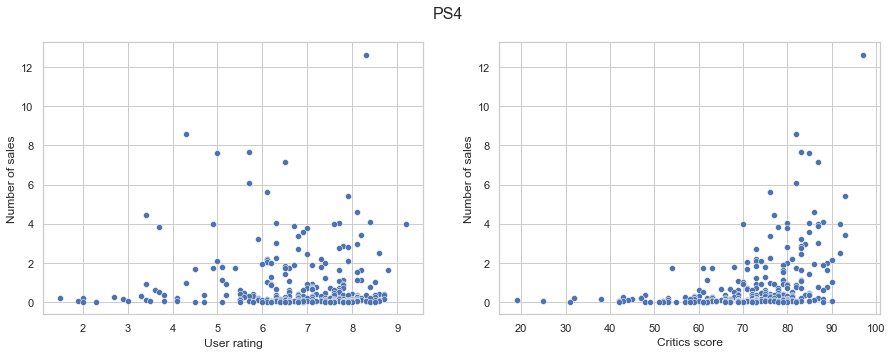

Correlation between critics reviews and sales PS4 : weak 0.41
Correlation between user reviews and sales PS4 : very weak 0.03




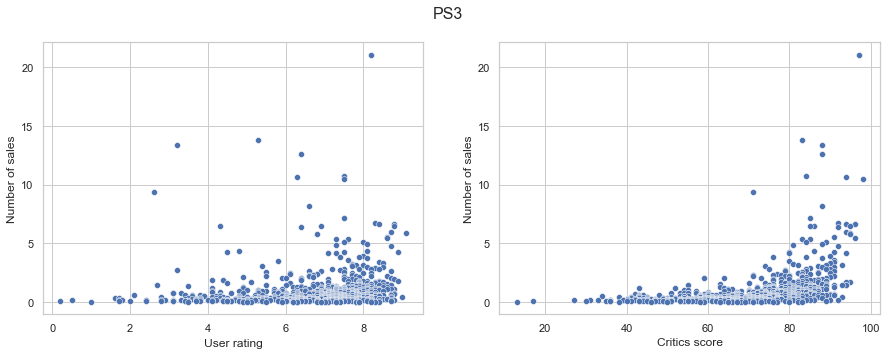

Correlation between critics reviews and sales PS3 : weak 0.43
Correlation between user reviews and sales PS3 : very weak 0.13




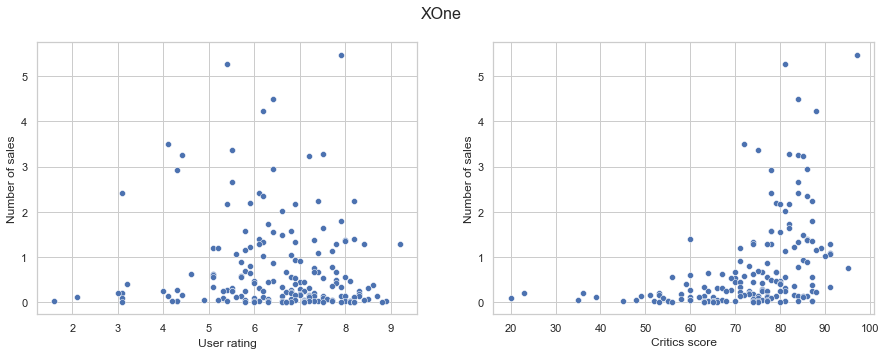

Correlation between critics reviews and sales XONE : weak 0.42
Correlation between user reviews and sales XONE : very weak 0.07




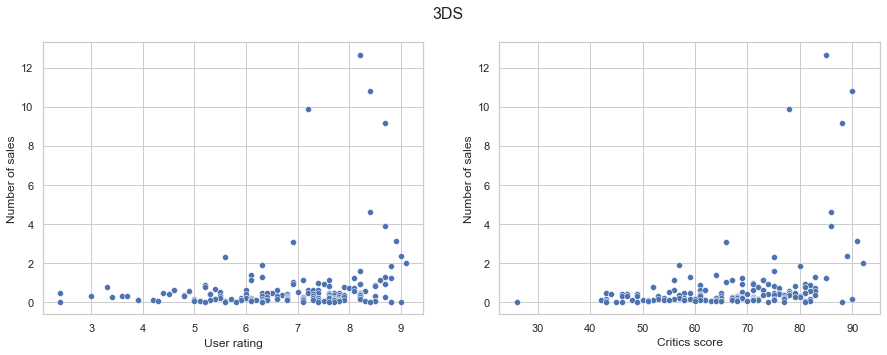

Correlation between critics reviews and sales 3DS : weak 0.35
Correlation between user reviews and sales 3DS : very weak 0.22




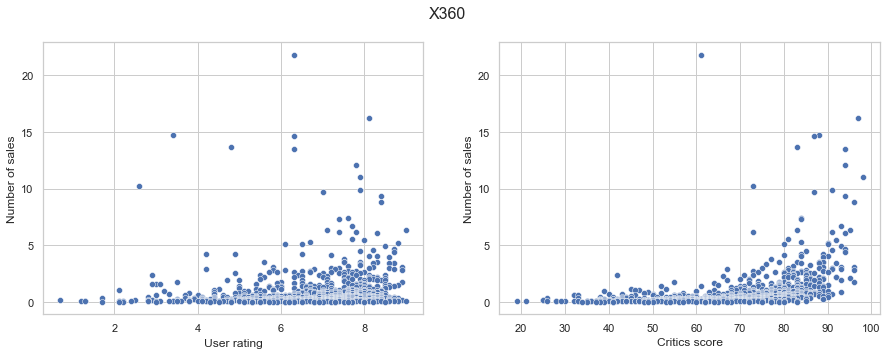

Correlation between critics reviews and sales X360 : weak 0.39
Correlation between user reviews and sales X360 : very weak 0.11




In [27]:
# using the loop, display all 5 graphs
for platform in list_of_top_5:
    other_platform_matrix(platform)

We found out that:

* the correlation between reviews and sales is weak or very weak, i.e. sales do not strongly depend on the ratings of users and critics;
* buyers listen more to critics than to the assessments of other users.

Let's look at the general distribution of games by genre and find out which of them are the most profitable.

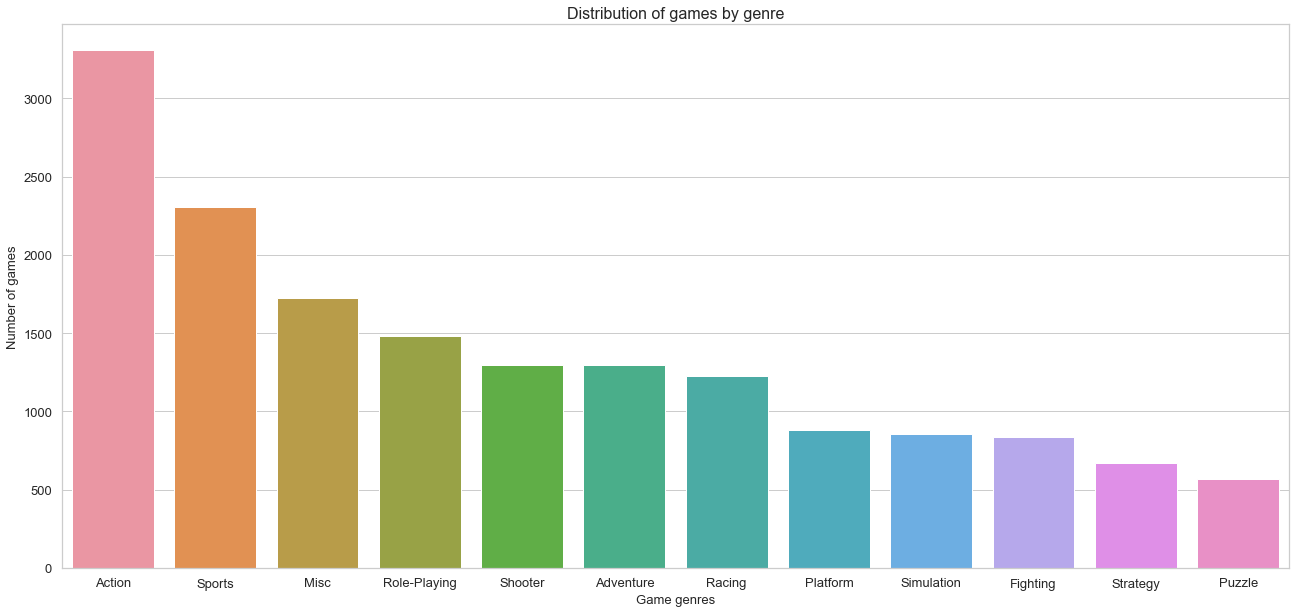

In [28]:
# formation of a pivot table
genre_by_number = (
    df
    .pivot_table(index='genre', values='name', aggfunc='count')
    .sort_values(by='name', ascending=False)
)

# building a bar chart
plt.figure(figsize=(22,10))
sns.barplot(x=genre_by_number.index, y='name', data=genre_by_number)
plt.title('Distribution of games by genre', fontsize=16)
plt.tick_params(labelsize=13)
plt.xlabel('Game genres', fontsize=13)
plt.ylabel('Number of games', fontsize=13)
plt.show()

Top 5 genres by number of games:

* Action;
* Sports;
* Misc;
* Role-Playing;
* Shooter.

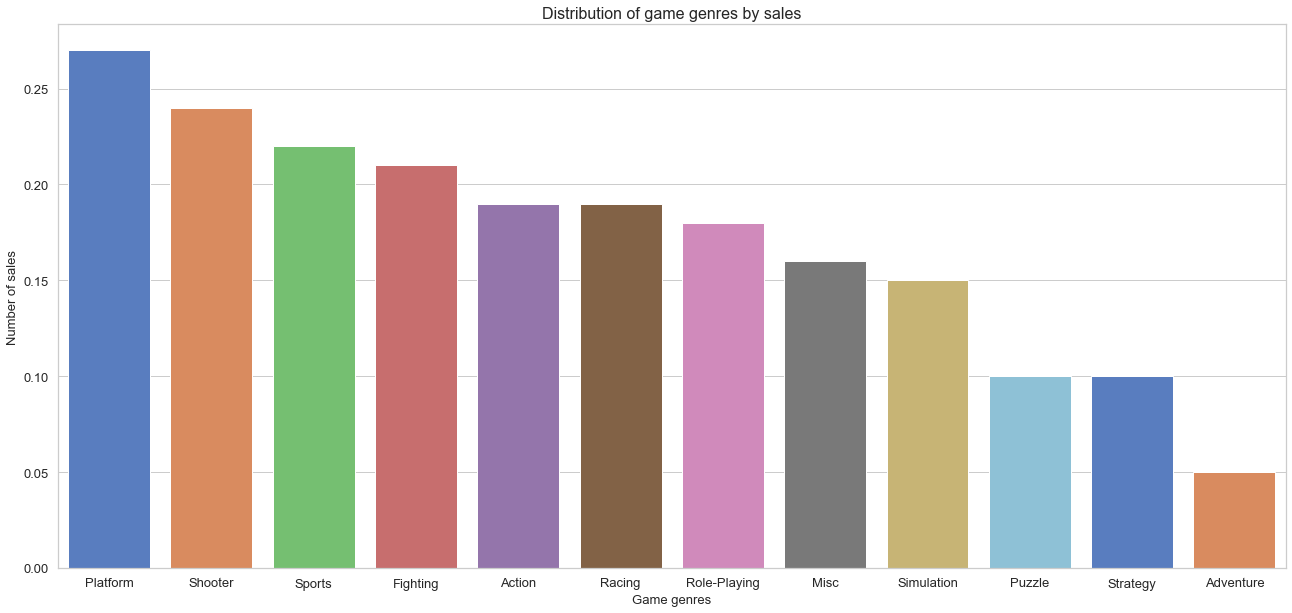

In [29]:
# formation of a pivot table
genre_by_sales = (
    df
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values(by='total_sales', ascending=False)
)

# building a bar chart
plt.figure(figsize=(22,10))
sns.barplot(x=genre_by_sales.index, y='total_sales', data=genre_by_sales, palette='muted')
plt.title('Distribution of game genres by sales', fontsize=16)
plt.tick_params(labelsize=13)
plt.xlabel('Game genres', fontsize=13)
plt.ylabel('Number of sales', fontsize=13)
plt.show()

Top 5 genres by sales:

* Platform;
* Shooter;
* Sports;
* Fighting;
* Action.

**Conclusions**

The exploratory data analysis revealed the following:
* The number of games for game consoles and computers grew continuously from 1991 to 2008, then there is a decline in the number of console games, presumably with the rise in popularity of mobile platforms;
* The most popular platforms of all time were Sony PlayStation 2, Microsoft Xbox360, Sony PlayStation 3, Nintendo Wii and Nintendo DS;
* The average number of years of life of a gaming platform is almost 8 years, of which half the period of sales is growing;
* Over the past 4 years, Sony PlayStation 4, Sony PlayStation 3, Microsoft Xbox One, Nintendo 3DS and Microsoft Xbox360 have become the most popular platforms;
* Sales by platform in the top 5 are similar;
* Sales do not depend much on user and critic ratings;
* The best selling and most common genres are Action, Sport and Shooter.
* The most unsold and least numerous genres in terms of the number of games are Simulation, Puzzle and Strategy.

## Drawing up a portrait of users of each region

Define for the user of each region (NA, EU, JP):

* Most popular platforms (top 5);
* The most popular genres (top 5);
* Impact of ESRB rating on sales.

The data will be taken for the current period (from 2013 to 2016).

In [30]:
# we will form a function that will draw bar charts and display pivot tables with indicators
def forpivot(row, title):
    fig, ax = plt.subplots(1, 1)
    for pivot in list(['platform','genre','rating']):
        ppivot = (
            df
            .loc[df['year_of_release'] >= 2013] 
            .pivot_table(index=pivot, values=row, aggfunc='sum')
            .sort_values(by=row, ascending=False)
            .head()
        )
        ppivot['ratio'] = round(ppivot[row] / ppivot[row].sum(), 2)
                        
        sns.set_palette('Set3')
        sns.barplot(data=ppivot, x=ppivot.index, y=row)
        fig.suptitle(title, fontsize=14)
        plt.show()
        print(ppivot)

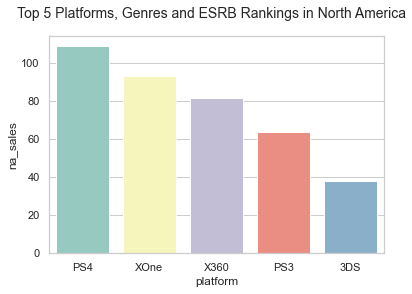

          na_sales  ratio
platform                 
PS4         108.74   0.28
XOne         93.12   0.24
X360         81.66   0.21
PS3          63.50   0.16
3DS          38.20   0.10


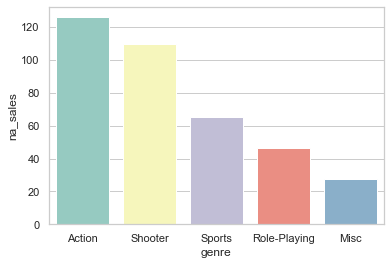

              na_sales  ratio
genre                        
Action          126.05   0.34
Shooter         109.74   0.29
Sports           65.27   0.17
Role-Playing     46.40   0.12
Misc             27.49   0.07


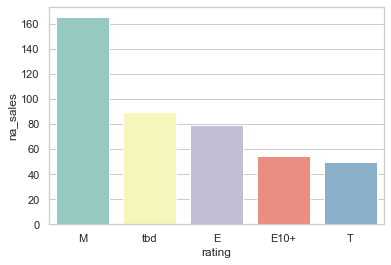

        na_sales  ratio
rating                 
M         165.21   0.38
tbd        89.42   0.20
E          79.05   0.18
E10+       54.24   0.12
T          49.79   0.11


In [31]:
forpivot('na_sales','Top 5 Platforms, Genres and ESRB Rankings in North America')

**North American user portrait**

* The most popular platforms are Sony PlayStation 4, Microsoft Xbox One, Microsoft Xbox360, Sony PlayStation 3 and Nintendo 3DS;
* The most popular genres are Action, Shooter, Sports, Role-Playing and Misc;
* The most popular games by ESRB are M for Mature, E for Everyone, E10+ for Everyone from 10 years and older, and T for Teens.

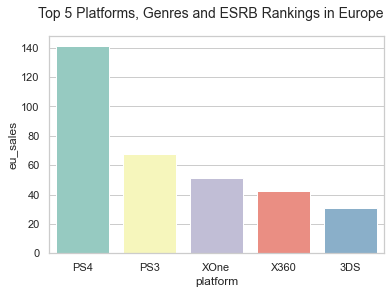

          eu_sales  ratio
platform                 
PS4         141.09   0.42
PS3          67.81   0.20
XOne         51.59   0.15
X360         42.52   0.13
3DS          30.96   0.09


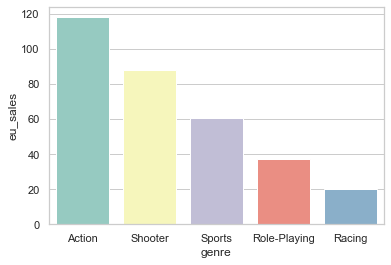

              eu_sales  ratio
genre                        
Action          118.13   0.36
Shooter          87.86   0.27
Sports           60.52   0.19
Role-Playing     36.97   0.11
Racing           20.19   0.06


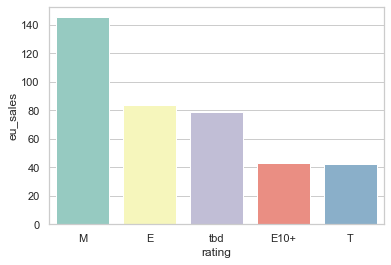

        eu_sales  ratio
rating                 
M         145.32   0.37
E          83.36   0.21
tbd        78.91   0.20
E10+       42.69   0.11
T          41.95   0.11


In [32]:
forpivot('eu_sales','Top 5 Platforms, Genres and ESRB Rankings in Europe')

**Europe user portrait**

* The most popular platforms are Sony PlayStation 4, Sony PlayStation 3, Microsoft Xbox One, Microsoft Xbox360 and Nintendo 3DS;
* The most popular genres are Action, Shooter, Sports, Role-Playing and Racing;
* The most popular ESRB games are M for Mature, E for Everyone, Unrated Games, E10+ for Everyone from 10 years and older, and T for Teens.

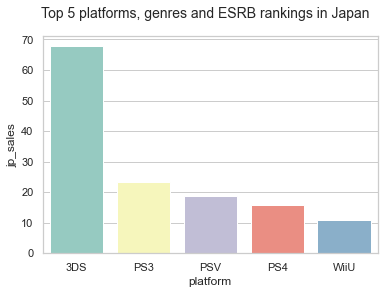

          jp_sales  ratio
platform                 
3DS          67.81   0.50
PS3          23.35   0.17
PSV          18.59   0.14
PS4          15.96   0.12
WiiU         10.88   0.08


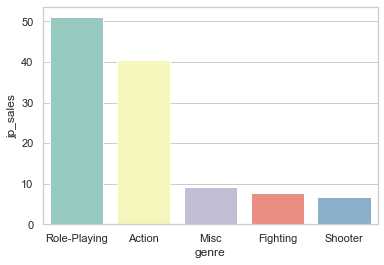

              jp_sales  ratio
genre                        
Role-Playing     51.04   0.44
Action           40.49   0.35
Misc              9.20   0.08
Fighting          7.65   0.07
Shooter           6.61   0.06


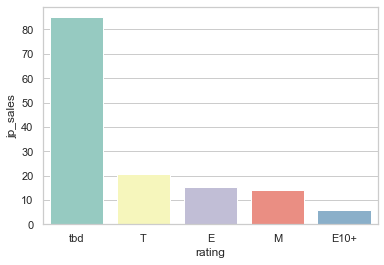

        jp_sales  ratio
rating                 
tbd        85.05   0.60
T          20.59   0.15
E          15.14   0.11
M          14.11   0.10
E10+        5.89   0.04


In [33]:
forpivot('jp_sales','Top 5 platforms, genres and ESRB rankings in Japan')

**Japan user portrait**

* The most popular platforms are Nintendo 3DS, Sony PlayStation 3, Sony PlayStation Vita, Sony PlayStation 4 and Nintendo Wii U;
* The most popular genres are Role-Playing, Action, Misc, Fighting and Shooter;
* The most popular games according to ESRB are Unrated Games, T for Teens, E for Everyone, M for Mature and E10+ for Everyone from 10 years and older.

**Conclusions**

In the course of compiling portraits of users from different regions, it was possible to find out that:
* In the top of the most popular platforms in both North America and Europe, the same set-top boxes, but there is a difference in sales shares. In North America, the position of the local Microsoft brand is traditionally strong, so in the top 3, the distribution of sales between Sony PS 4 (the latest console) and Xbox One with Xbox360 is approximately equal. In Europe, Sony PS 4 occupies a significant part of the market. As for Japan, Nintendo products are more popular here, 2 consoles account for more than half of sales. Of the interesting features, sales of the new Sony PS 4 occupy the penultimate place in the top 5. It can be concluded that the Japanese love the old platforms and continue to buy games on them;
* In terms of genres, the situation in North America and Europe is very similar, the top 4 are the same, up to sales shares. These are Action, Shooter, Sports and Role-Playing. Japan stands out again, 2 genres Role-Playing and Action account for a significant part of the market, also in the top there is a Fighting genre that is uncharacteristic for the top lists of other regions;
* According to the ESRB ratings, the situation is identical to the situation with genres. In North America and in Europe, the picture is the same, down to sales shares. These are "M" ("Mature") (leading by a wide margin), "E" ("Everyone"), "Unrated Games", "E10+" ("Everyone 10 and older") and "T" ("Teen"). In Japan, the order is quite different, "Unrated Games" account for the majority of sales, "T" ("Teen"), "E" ("Everyone") and "M" ("Mature") account for approximately equal market shares, closes the top "E10+" ("Everyone 10 and older").

## Hypothesis testing

We need to test the hypotheses:

     * the average user ratings of the Xbox One and PC platforms are the same;
     * Average user ratings for Action and Sports genres are different.
    
First, we need to formulate the null and alternative hypotheses for each of the hypotheses to test them.

### The average user ratings of the Xbox One and PC platforms are the same

In this particular case, we need to compare the average of the two populations with each other. The hypotheses can be formulated as follows:

    * H₀ - the average user ratings of the Xbox One and PC platforms are the same;
    * H₁ - Average user ratings for Xbox One and PC platforms differ.
    
We use a hypothesis test about the equality of the means of two general populations. Let's set the alpha threshold value to 0.05. To begin with, we will form auxiliary dataframes for the Xbox One and PC platforms, with the condition of the release date from 2013 (the year the Xbox One was released, this will be more relevant) and remove the missing user rating values from them.

In [34]:
df_xbox_one = df.loc[(df['platform'] == 'XOne') & (df['year_of_release'] >= 2013)]
df_xbox_one = df_xbox_one.dropna(subset=['user_score'])
df_pc = df.loc[(df['platform'] == 'PC') & (df['year_of_release'] >= 2013)]
df_pc = df_pc.dropna(subset=['user_score'])

Now we need to check the variance values to set the "equal variance" parameter.

In [35]:
print('Xbox One platform user rating variance:', 
      round(np.var(df_xbox_one['user_score']), 2))
print('PC platform user rating variance:', 
      round(np.var(df_pc['user_score']), 2))

Xbox One platform user rating variance: 1.9
PC platform user rating variance: 3.02


Так как значения дисперсий разные, примем параметр `equal_var = False`.

In [36]:
alpha = .05 # critical level of statistical significance

results = st.ttest_ind(df_xbox_one['user_score'], df_pc['user_score'], equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')    

p-value: 0.14759594013430463
Failed to reject the null hypothesis


According to the test results, it is clear that the resulting p-value indicates that the probability of obtaining such or a greater difference is randomly high. Therefore, the average user ratings of the Xbox One and PC platforms differ slightly. That is, with a probability of 14.7%, you can get a difference in the ratings of the two platforms.

### Average user ratings for the Action and Sports genres are different

In this case, we also need to compare the average of the two populations with each other. The hypotheses can be formulated as follows:

     * H₀ - average user ratings of Action and Sports genres are the same;
     * H₁ - Average user ratings for the Action and Sports genres differ.
    
We use a hypothesis test about the equality of the means of two general populations. Let's set the alpha threshold value to 0.05. To begin with, let's form auxiliary dataframes for the Action and Sports genres for the current period and remove the missing values from them.

In [37]:
df_action = df.loc[(df['genre'] == 'Action') & (df['year_of_release'] >= 2013)]
df_action = df_action.dropna(subset=['user_score'])
df_sports = df.loc[(df['genre'] == 'Sports') & (df['year_of_release'] >= 2013)]
df_sports = df_sports.dropna(subset=['user_score'])

Now we need to check the variance values to set the "equal variance" parameter.

In [38]:
print('Action genre user rating variance:', 
      round(np.var(df_action['user_score']), 2))
print('Sports genre user rating variance:', 
      round(np.var(df_sports['user_score']), 2))

Action genre user rating variance: 1.76
Sports genre user rating variance: 3.16


Since the values of the variances are different, we will accept the parameter `equal_var = False`.

In [39]:
alpha = .05 # critical level of statistical significance

results = st.ttest_ind(df_action['user_score'], df_sports['user_score'], equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value: 1.4460039700704315e-20
Rejecting the null hypothesis


According to the test results, it is clear that the resulting p-value indicates that the probability of obtaining such or a greater difference is randomly high. Therefore, the average user ratings of the Action and Sports genres are different, with a probability of 99.9%.

## Conclusions

The main objective of the study was to plan advertising campaigns based on the results of the analysis of game sales data.

To conduct a correct analysis, it was necessary to process the available data:

* replace the names of the columns, bring them to lower case;
* lead to the correct type of data on the year of release of games and user rating;
* handle missing values by Game Names, Release Year and Genre;
* calculate and enter data on total sales into the dataframe.

Let's highlight the main theses for global sales:

* the average life of each platform is 8 years, of which there is an increase in sales within 4 years, then an inevitable fall;
* popular current platforms are Sony PlayStation 4, Sony PlayStation 3 and Microsoft Xbox One;
* sales do not strongly depend on the ratings of users and critics, but users prefer to listen more to the ratings of critics;
* top 3 best selling game genres are Action, Shooter and Sports;
* Top selling games are rated M, E and E10+ by the ESRB. Separately, it is worth mentioning games without a rating.

Additionally, it was determined that:

* the average user ratings of the Xbox One and PC platforms are the same;
* average user ratings for Action and Sports genres are different;
* user portraits were also compiled in various regions (North America, Europe and Japan).